# **Occupancy Detection - by Arya Adhy**

![banner](https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/assets/banner.png)

## **Data Preparation**

### **Import Libraries**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

### **Read Datasets**

In [5]:
datatest_1 = pd.read_csv("https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/dataset/datatest.csv")
datatest_2 = pd.read_csv("https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/dataset/datatest2.csv")
datatraining = pd.read_csv("https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/dataset/datatraining.csv")

### **Data Cleaning**

In [6]:
# Duplicate, missing values, and data types summary function
def missing_values_summary(df, name):
    print(f'Duplicate values {name}:', df.duplicated().sum())
    msv = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
    msv['Percentage'] = (msv['Total Null Values']/df.shape[0])*100
    msv["Data Type"] = [df[col].dtype for col in df.columns]
    msv.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
    return msv.style.background_gradient(cmap='Blues')

In [7]:
missing_values_summary(datatest_1, "datatest_1")

Duplicate values datatest_1: 2


,Total Null Values,Percentage,Data Type
date,0,0.000000,object
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [8]:
missing_values_summary(datatest_2, "datatest_2")

Duplicate values datatest_2: 27


,Total Null Values,Percentage,Data Type
date,0,0.000000,object
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [9]:
missing_values_summary(datatraining, "datatraining")

Duplicate values datatraining: 25


,Total Null Values,Percentage,Data Type
date,0,0.000000,object
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


**Observation :**<br>
1. Masing - masing *`Datatest_1`, `Datatest_2`, `Datatraining`* memiliki duplicate values berturut-turut *`2`,`27`,`25`*
2. Ketiga dataset tidak memiliki Missing values
3. Ketiga dataset memiliki tipe data yang sama pada masing-masing feature seperti dibawah ini:

List of Column Types:
- `date` : object
- `Temperature` : float
- `Humidity` : float
- `Light` : float
- `CO2` : float
- `HumidityRatio` : float
- `Occupancy` : int

**To Do**
1. Melakukan *cleaning duplicates values*
2. Melakukan *manipulasi tipe data*


In [10]:
# 1. Remove duplicates values and keep the first occurrence
for df in [datatest_1, datatest_2, datatraining]:
    df.drop_duplicates(keep='first', inplace=True)

# Verify duplicates removal
for df, name in zip([datatest_1, datatest_2, datatraining], 
                    ["datatest_1", "datatest_2", "datatraining"]):
    print(f'Duplicate values after removal {name}:', df.duplicated().sum())

Duplicate values after removal datatest_1: 0
Duplicate values after removal datatest_2: 0
Duplicate values after removal datatraining: 0


In [11]:
# 2. Change data type of "date" column to datetime format
for df in [datatest_1, datatest_2, datatraining]:
    df['date'] = pd.to_datetime(df['date'])

# Verify data type change
for df, name in zip([datatest_1, datatest_2, datatraining], 
                    ["datatest_1", "datatest_2", "datatraining"]):
    print(f'Data type of "date" column in {name}:', df['date'].dtype)

Data type of "date" column in datatest_1: datetime64[ns]
Data type of "date" column in datatest_2: datetime64[ns]
Data type of "date" column in datatraining: datetime64[ns]


**Final Check After Cleaning Missing Values, Duplicate Values and Data Type**

In [12]:
missing_values_summary(datatest_1, "datatest_1 after cleaning")

Duplicate values datatest_1 after cleaning: 0


,Total Null Values,Percentage,Data Type
date,0,0.000000,datetime64[ns]
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [13]:
missing_values_summary(datatest_2, "datatest_2 after cleaning")

Duplicate values datatest_2 after cleaning: 0


,Total Null Values,Percentage,Data Type
date,0,0.000000,datetime64[ns]
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [14]:
missing_values_summary(datatraining, "datatraining after cleaning")

Duplicate values datatraining after cleaning: 0


,Total Null Values,Percentage,Data Type
date,0,0.000000,datetime64[ns]
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


### **Statistic summary** 

In [15]:
datasets = {
    "datatest_1": datatest_1,
    "datatest_2": datatest_2,
    "datatraining": datatraining
}

def compare_describe(datasets):
    return pd.concat(
        {name: df.describe().T for name, df in datasets.items()}
    )

compare_describe(datasets)

count                           mean  \
datatest_1   date             2663  2015-02-03 12:31:06.150957568   
             Temperature    2663.0                      21.434619   
             Humidity       2663.0                      25.356159   
             Light          2663.0                     193.372676   
             CO2            2663.0                     718.117252   
             HumidityRatio  2663.0                       0.004028   
             Occupancy      2663.0                       0.365002   
datatest_2   date             9725  2015-02-15 00:00:12.481233664   
             Temperature    9725.0                      21.003622   
             Humidity       9725.0                       29.88527   
             Light          9725.0                     123.402925   
             CO2            9725.0                     753.226073   
             HumidityRatio  9725.0                       0.004588   
             Occupancy      9725.0                       0.210694   
datatraining date             8118  2015-02-07 13:41:22.150776064   
             Temperature    8118.0                      20.620773   
             Humidity       8118.0                      25.731275   
             Light          8118.0                     119.884487   
             CO2            8118.0                     607.017807   
             HumidityRatio  8118.0                       0.003863   
             Occupancy      8118.0                       0.212983   

                                            min                  25%  \
datatest_1   date           2015-02-02 14:19:00  2015-02-03 01:24:30   
             Temperature                   20.2                20.65   
             Humidity                      22.1             23.27875   
             Light                          0.0                  0.0   
             CO2                          427.5                466.0   
             HumidityRatio             0.003303             0.003532   
             Occupancy                      0.0                  0.0   
datatest_2   date           2015-02-11 14:48:00  2015-02-13 07:19:00   
             Temperature                   19.5                20.29   
             Humidity                    21.865            26.626667   
             Light                          0.0                  0.0   
             CO2                     484.666667                542.5   
             HumidityRatio             0.003275             0.004196   
             Occupancy                      0.0                  0.0   
datatraining date           2015-02-04 17:51:00  2015-02-06 03:46:15   
             Temperature                   19.0              19.7225   
             Humidity                    16.745                 20.2   
             Light                          0.0                  0.0   
             CO2                         412.75                439.0   
             HumidityRatio             0.002674             0.003078   
             Occupancy                      0.0                  0.0   

                                            50%                  75%  \
datatest_1   date           2015-02-03 12:32:00  2015-02-03 23:37:30   
             Temperature                  20.89            22.360833   
             Humidity                      25.0            26.863333   
             Light                          0.0                442.5   
             CO2                         580.75           956.541667   
             HumidityRatio             0.003815             0.004532   
             Occupancy                      0.0                  1.0   
datatest_2   date           2015-02-15 00:00:00  2015-02-16 16:40:00   
             Temperature                  20.79            21.533333   
             Humidity                      30.2                 32.7   
             Light                          0.0                210.0   
             CO2                          639.0              

**Observation**
1. Dari variabel `date` kita ketahui bahwa data direkam pada timeline yang berbeda dengan urutan `datatest_1` - `datatraining` - `datatest_2` sehigga dapat meningkatkan confidence validasi dari hasil evaluasi model. dan karena `date` bukan merupakan tipe data numerik sehingga menghasilkan NaN Values di kolom Standar Deviasi.
2. Variabel `Light` memiliki distribusi sangat skewed dengan median 0, yang berpotensi menjadi strong predictor terhadap `Occupancy`.
3. Dataset menunjukkan class imbalance dimana proporsi `Occupied` hanya sekitar `20–35%`, sehingga evaluasi model tidak dapat hanya mengandalkan `accuracy`.
4. Distribusi `CO2` menunjukkan peningkatan mean pada data test dibanding training, mengindikasikan kemungkinan adanya temporal distribution shift.

## **Explorator Data Analysis (EDA)**

### **Uni-Variate Analysis**

**Individual Box Plot and Violin Plot**

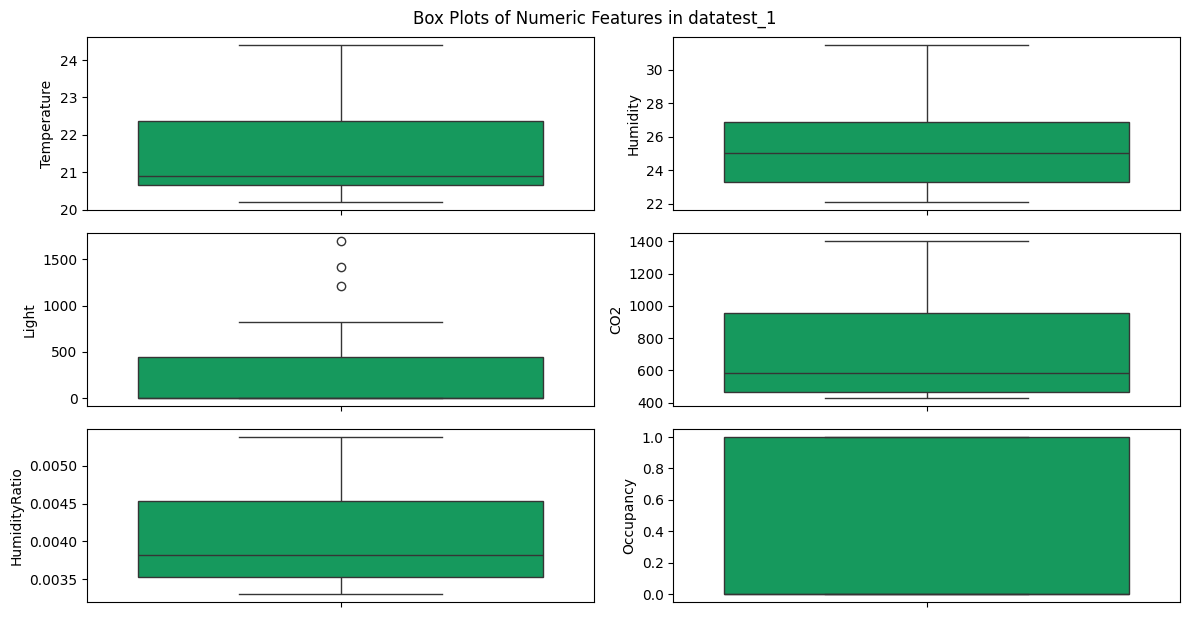

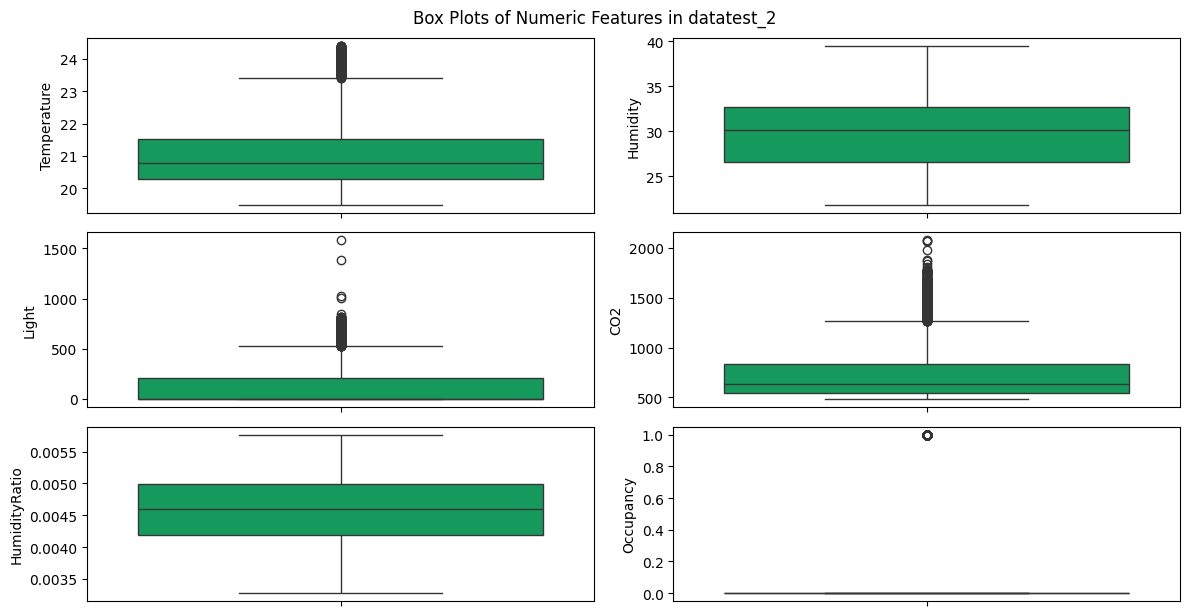

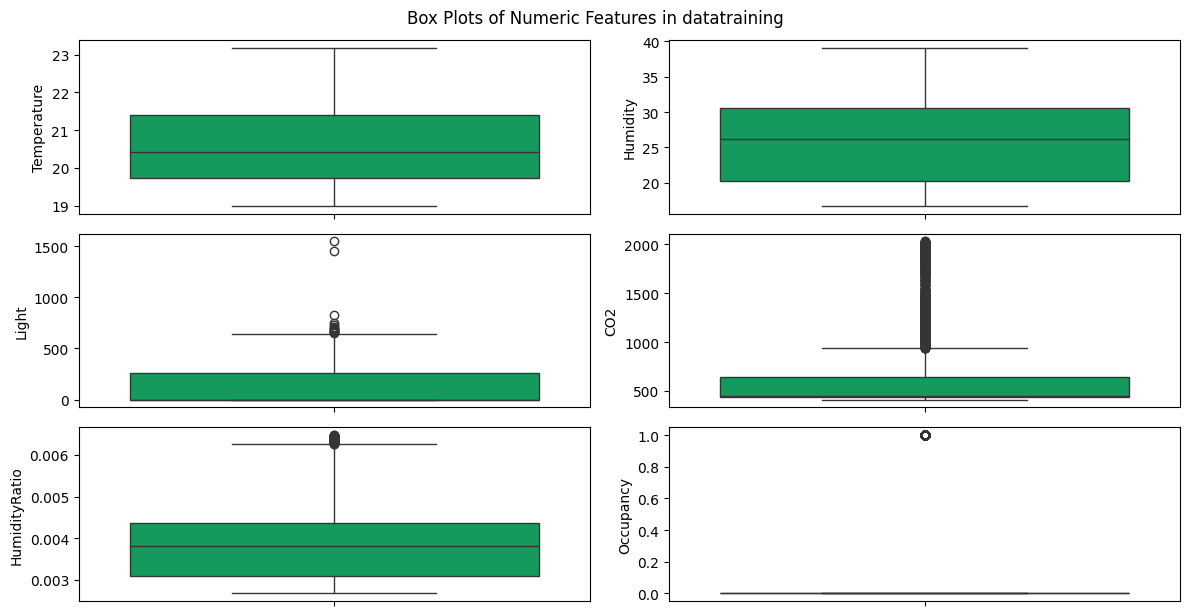

In [16]:
for name, df in datasets.items():
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    plt.figure(figsize=(12, 6))
    n = 3  # number of columns in subplot grid
    for i in range(0, len(numeric_cols)):
        plt.subplot(n, math.ceil(len(numeric_cols)/n), i+1)
        sns.boxplot(y=df[numeric_cols[i]], color='#00af5f', orient='v')
        plt.tight_layout()
    plt.suptitle(f'Box Plots of Numeric Features in {name}', y=1.02)
    plt.show()

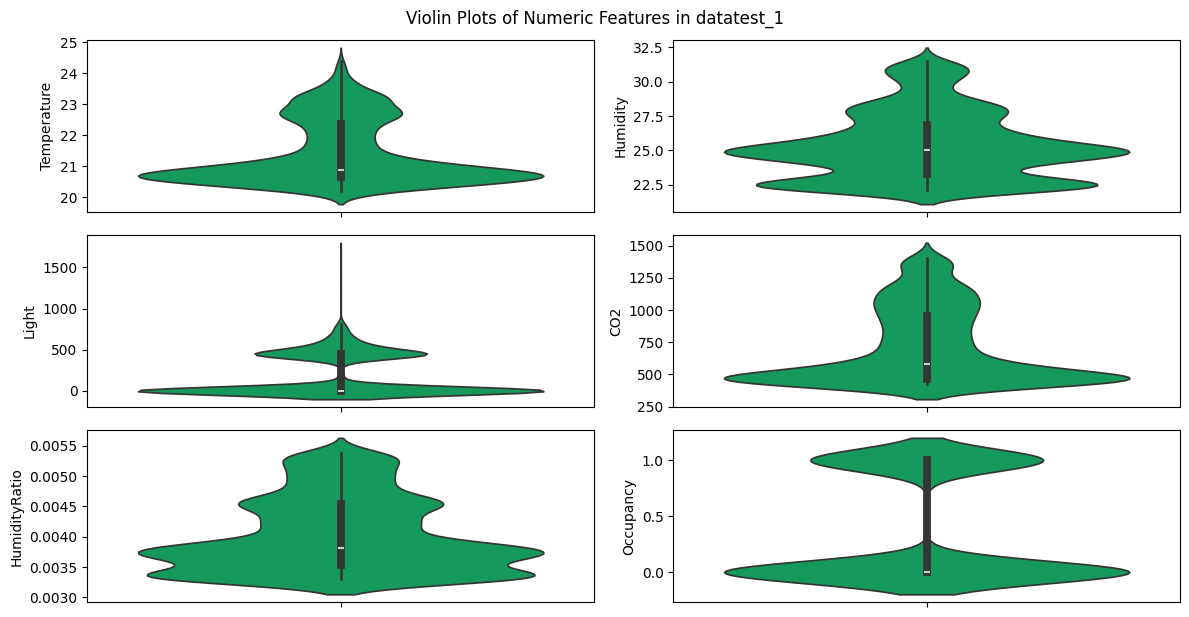

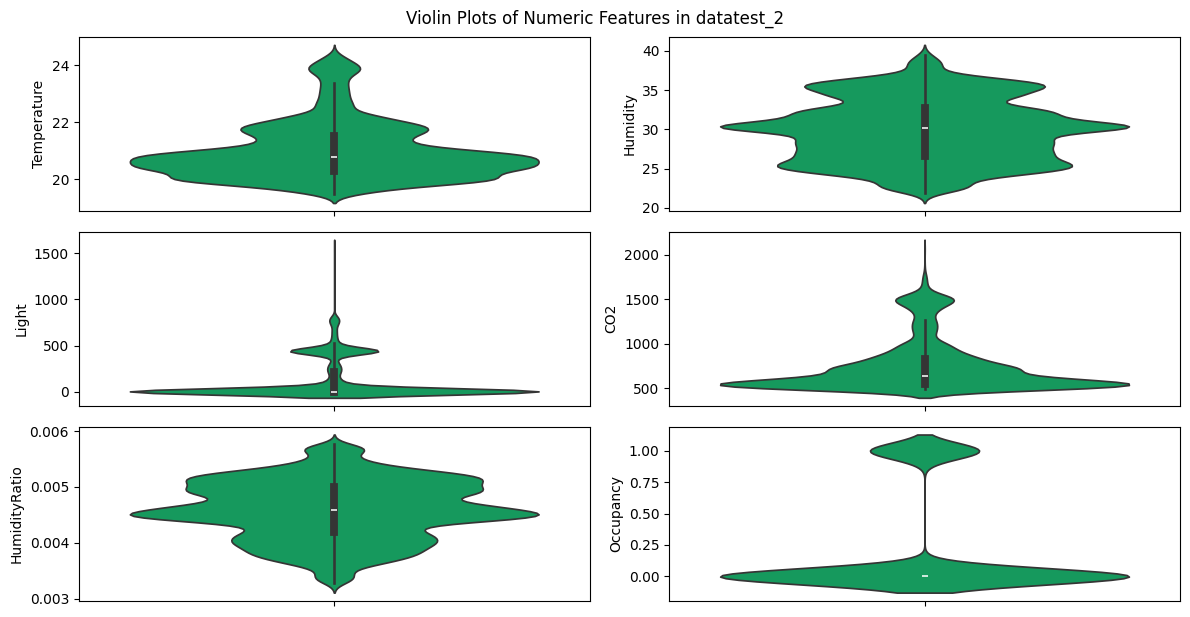

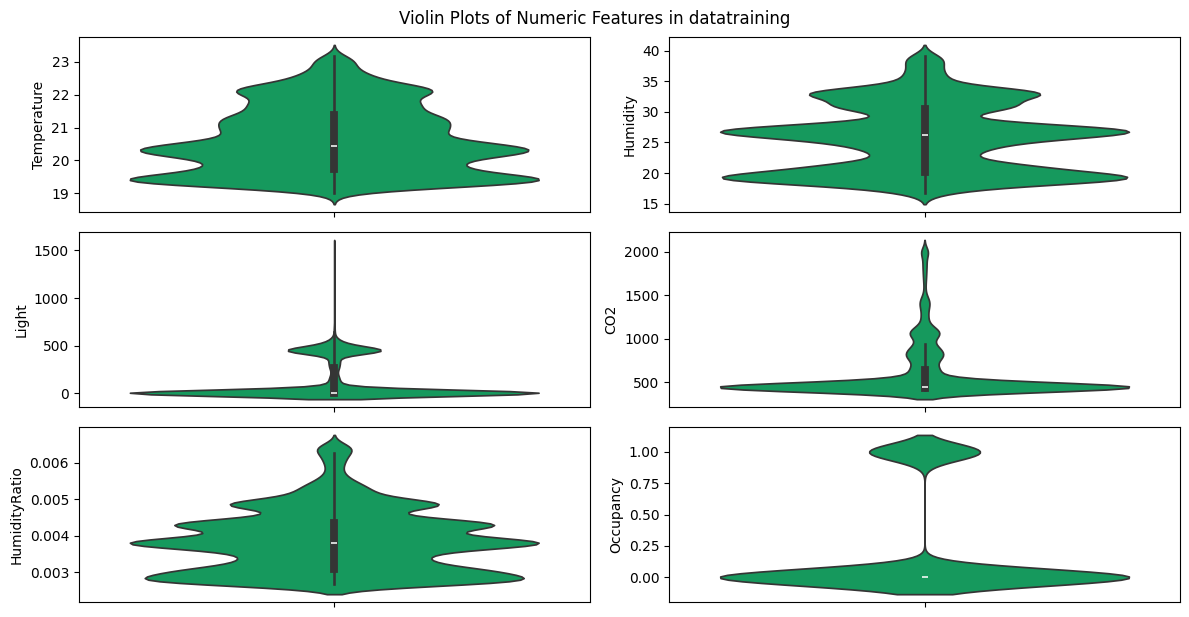

In [17]:
for name, df in datasets.items():
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    plt.figure(figsize=(12, 6))
    n = 3  # number of columns in subplot grid
    for i in range(0, len(numeric_cols)):
        plt.subplot(n, math.ceil(len(numeric_cols)/n), i+1)
        sns.violinplot(y=df[numeric_cols[i]], color='#00af5f', orient='v')
        plt.tight_layout()
    plt.suptitle(f'Violin Plots of Numeric Features in {name}', y=1.02)
    plt.show()

**Checking Outliers**

In [ ]:
datasets = {
    "Datatest_1": datatest_1,
    "Datatest_2": datatest_2,
    "Datatraining": datatraining
}

for name, df in datasets.items():
    
    print(f"\n===== {name} =====")
    print(f'Jumlah baris: {len(df)}')
    
    numeric_cols = df.select_dtypes(include='number').columns
    summary = []
    
    all_mask = pd.Series(True, index=df.index)
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        mask = df[col].between(lower, upper)
        
        summary.append({
            "Column Name": col,
            "is Outlier": (~mask).any(),
            "Lower Limit": lower,
            "Upper Limit": upper,
            "Outlier": (~mask).sum(),
            "No Outlier": mask.sum()
        })
        
        all_mask &= mask
    
    # Untuk menampilkan baris yang merupakan outlier
    # outlier_rows = df.loc[~all_mask] 
    
    # if len(outlier_rows) > 0:
    #     print("\nOutlier Rows (Combined):")
    #     display(outlier_rows)
    # else:
    #     print("Tidak ada baris outlier.")
    
    display(pd.DataFrame(summary))


===== Datatest_1 =====
Jumlah baris: 2663


,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Temperature,False,18.083750,24.927083,0,2663
1,Humidity,False,17.901875,32.240208,0,2663
2,Light,True,-663.750000,1106.250000,3,2660
3,CO2,False,-269.812500,1692.354167,0,2663
4,HumidityRatio,False,0.002033,0.006031,0,2663
5,Occupancy,False,-1.500000,2.500000,0,2663



===== Datatest_2 =====
Jumlah baris: 9725


,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Temperature,True,18.425000,23.398333,479,9246
1,Humidity,False,17.516667,41.810000,0,9725
2,Light,True,-315.000000,525.000000,424,9301
3,CO2,True,109.000000,1265.000000,1000,8725
4,HumidityRatio,False,0.002994,0.006199,0,9725
5,Occupancy,True,0.000000,0.000000,2049,7676



===== Datatraining =====
Jumlah baris: 8118


,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Temperature,False,17.221250,23.891250,0,8118
1,Humidity,False,4.700000,46.033333,0,8118
2,Light,True,-387.843750,646.406250,15,8103
3,CO2,True,137.500000,941.500000,1061,7057
4,HumidityRatio,True,0.001166,0.006264,118,8000
5,Occupancy,True,0.000000,0.000000,1729,6389


**Observation**
- Datatest_1
1. Terdapat outlier pada Variable `Light` sebanyak `3` dan box plot menunjukkan ouitler terletak diatas upper limit
- Datatest_2
1. Terdapat outlier pada Variable `Temperature` sebanyak `479` dan box plot menunjukkan ouitler terletak diatas upper limit
2. Terdapat outlier pada Variable `Light` sebanyak `424` dan box plot menunjukkan ouitler terletak diatas upper limit
3. Terdapat Outlier pada Variable `CO2` sebanyak `1000` dan box plot menunjukkan ouitler terletak diatas upper limit
- Datatraining 
1. Terdapat outlier pada Variable `Light` sebanyak `15` dan box plot menunjukkan ouitler terletak diatas upper limit
2. Terdapat outlier pada Variable `CO2` sebanyak `1061` dan box plot menunjukkan ouitler terletak diatas upper limit
3. Terdapat outlier pada variable `HumidityRartio` sebanyak `118` dan box plot menunjukkan ouitler terletak diatas upper limit

**Analisis dan inferences Outlier** 
1. Semua variable kecuali Occupancy merupakan hasil rekaman dari kondisi nyata ruangan, sehingga data fluktuatif.
2. Data CO2 yang memiliki outlier 10% - 13%, dengan persentase tersebut jika di hapus akan mempengaruhi distribusi data dan biasanya persentase tersebut dipengaruhi oleh distribusi data yang Skewed.
3. Selain karena akan mempengaruhi distribusi data, penghapusan tersebut akan mempengaruhi model yang akan memprediksi occupancy di lingkungan nyata yang fluktuatif, sehingga keadaan nyata diperlukan untuk melatih model.

**To Do**
1. Menggunakan model yang tidak terlelu peka terhadap outlier seperti Random Forest/XGBoost
2. Melakukan transform menggunakan RobustScaller untuk model yang sensitif terhadap outlier seperti Logistic Regression

### **Distplot**

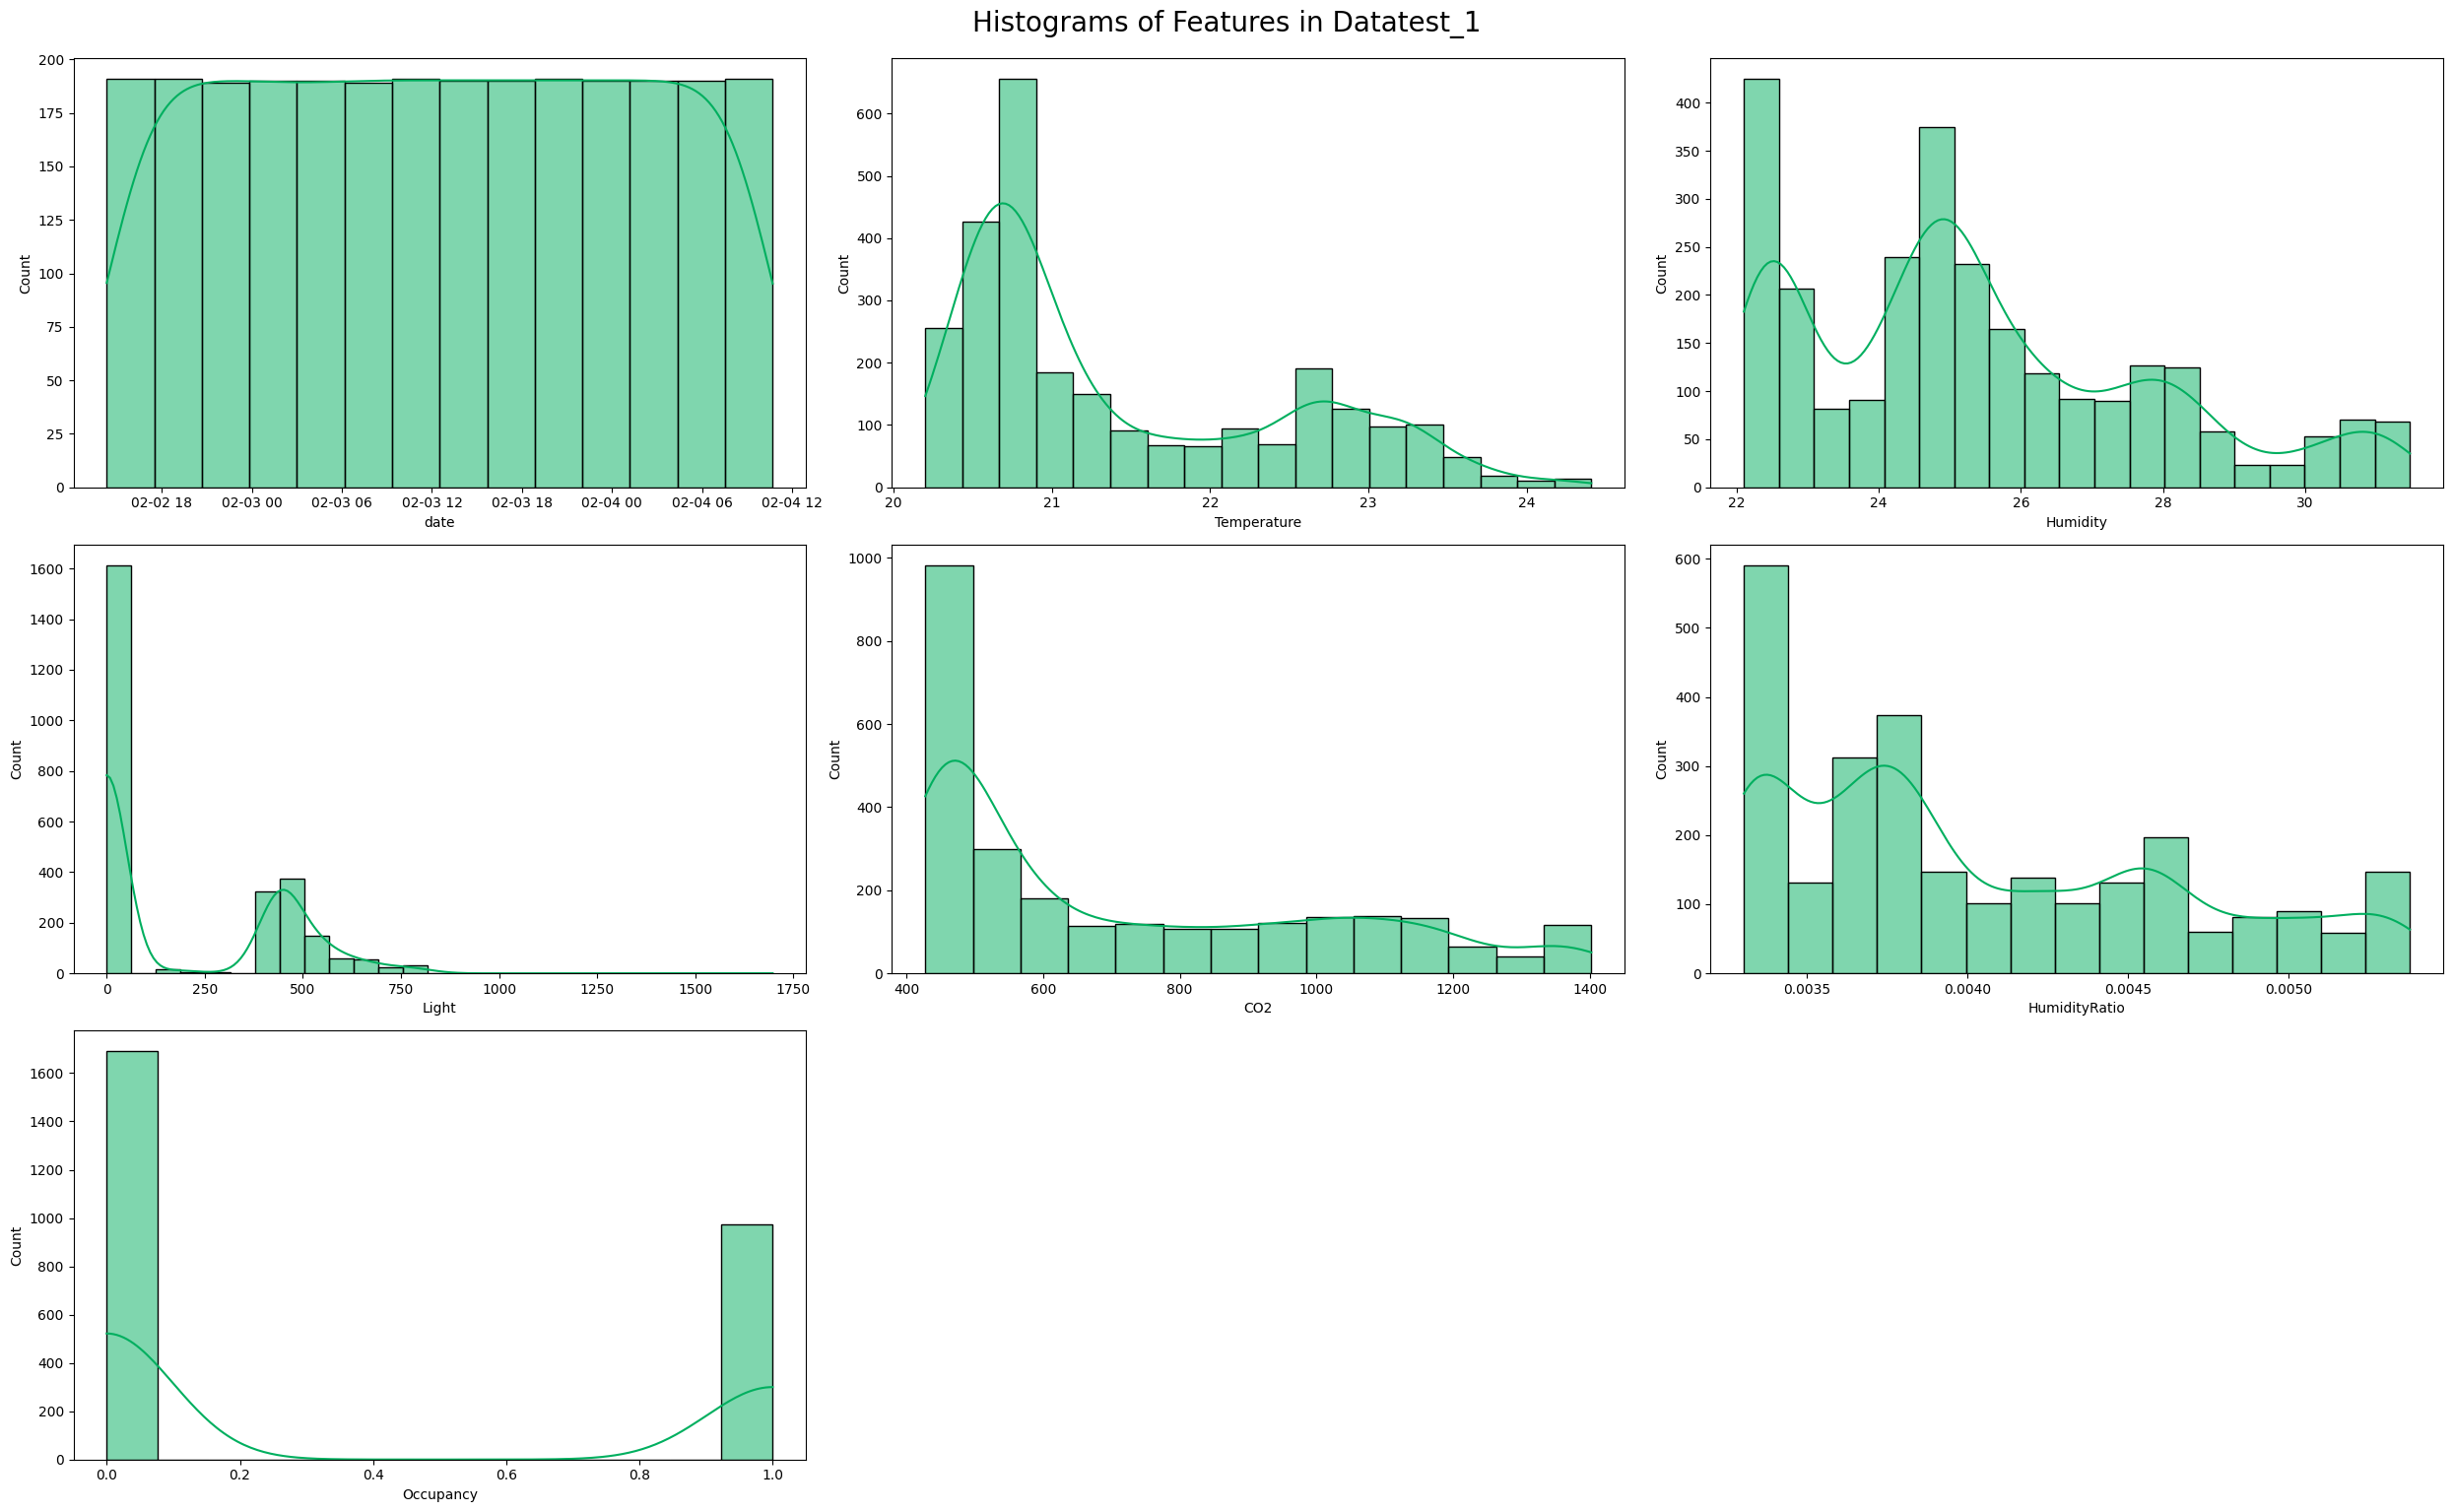

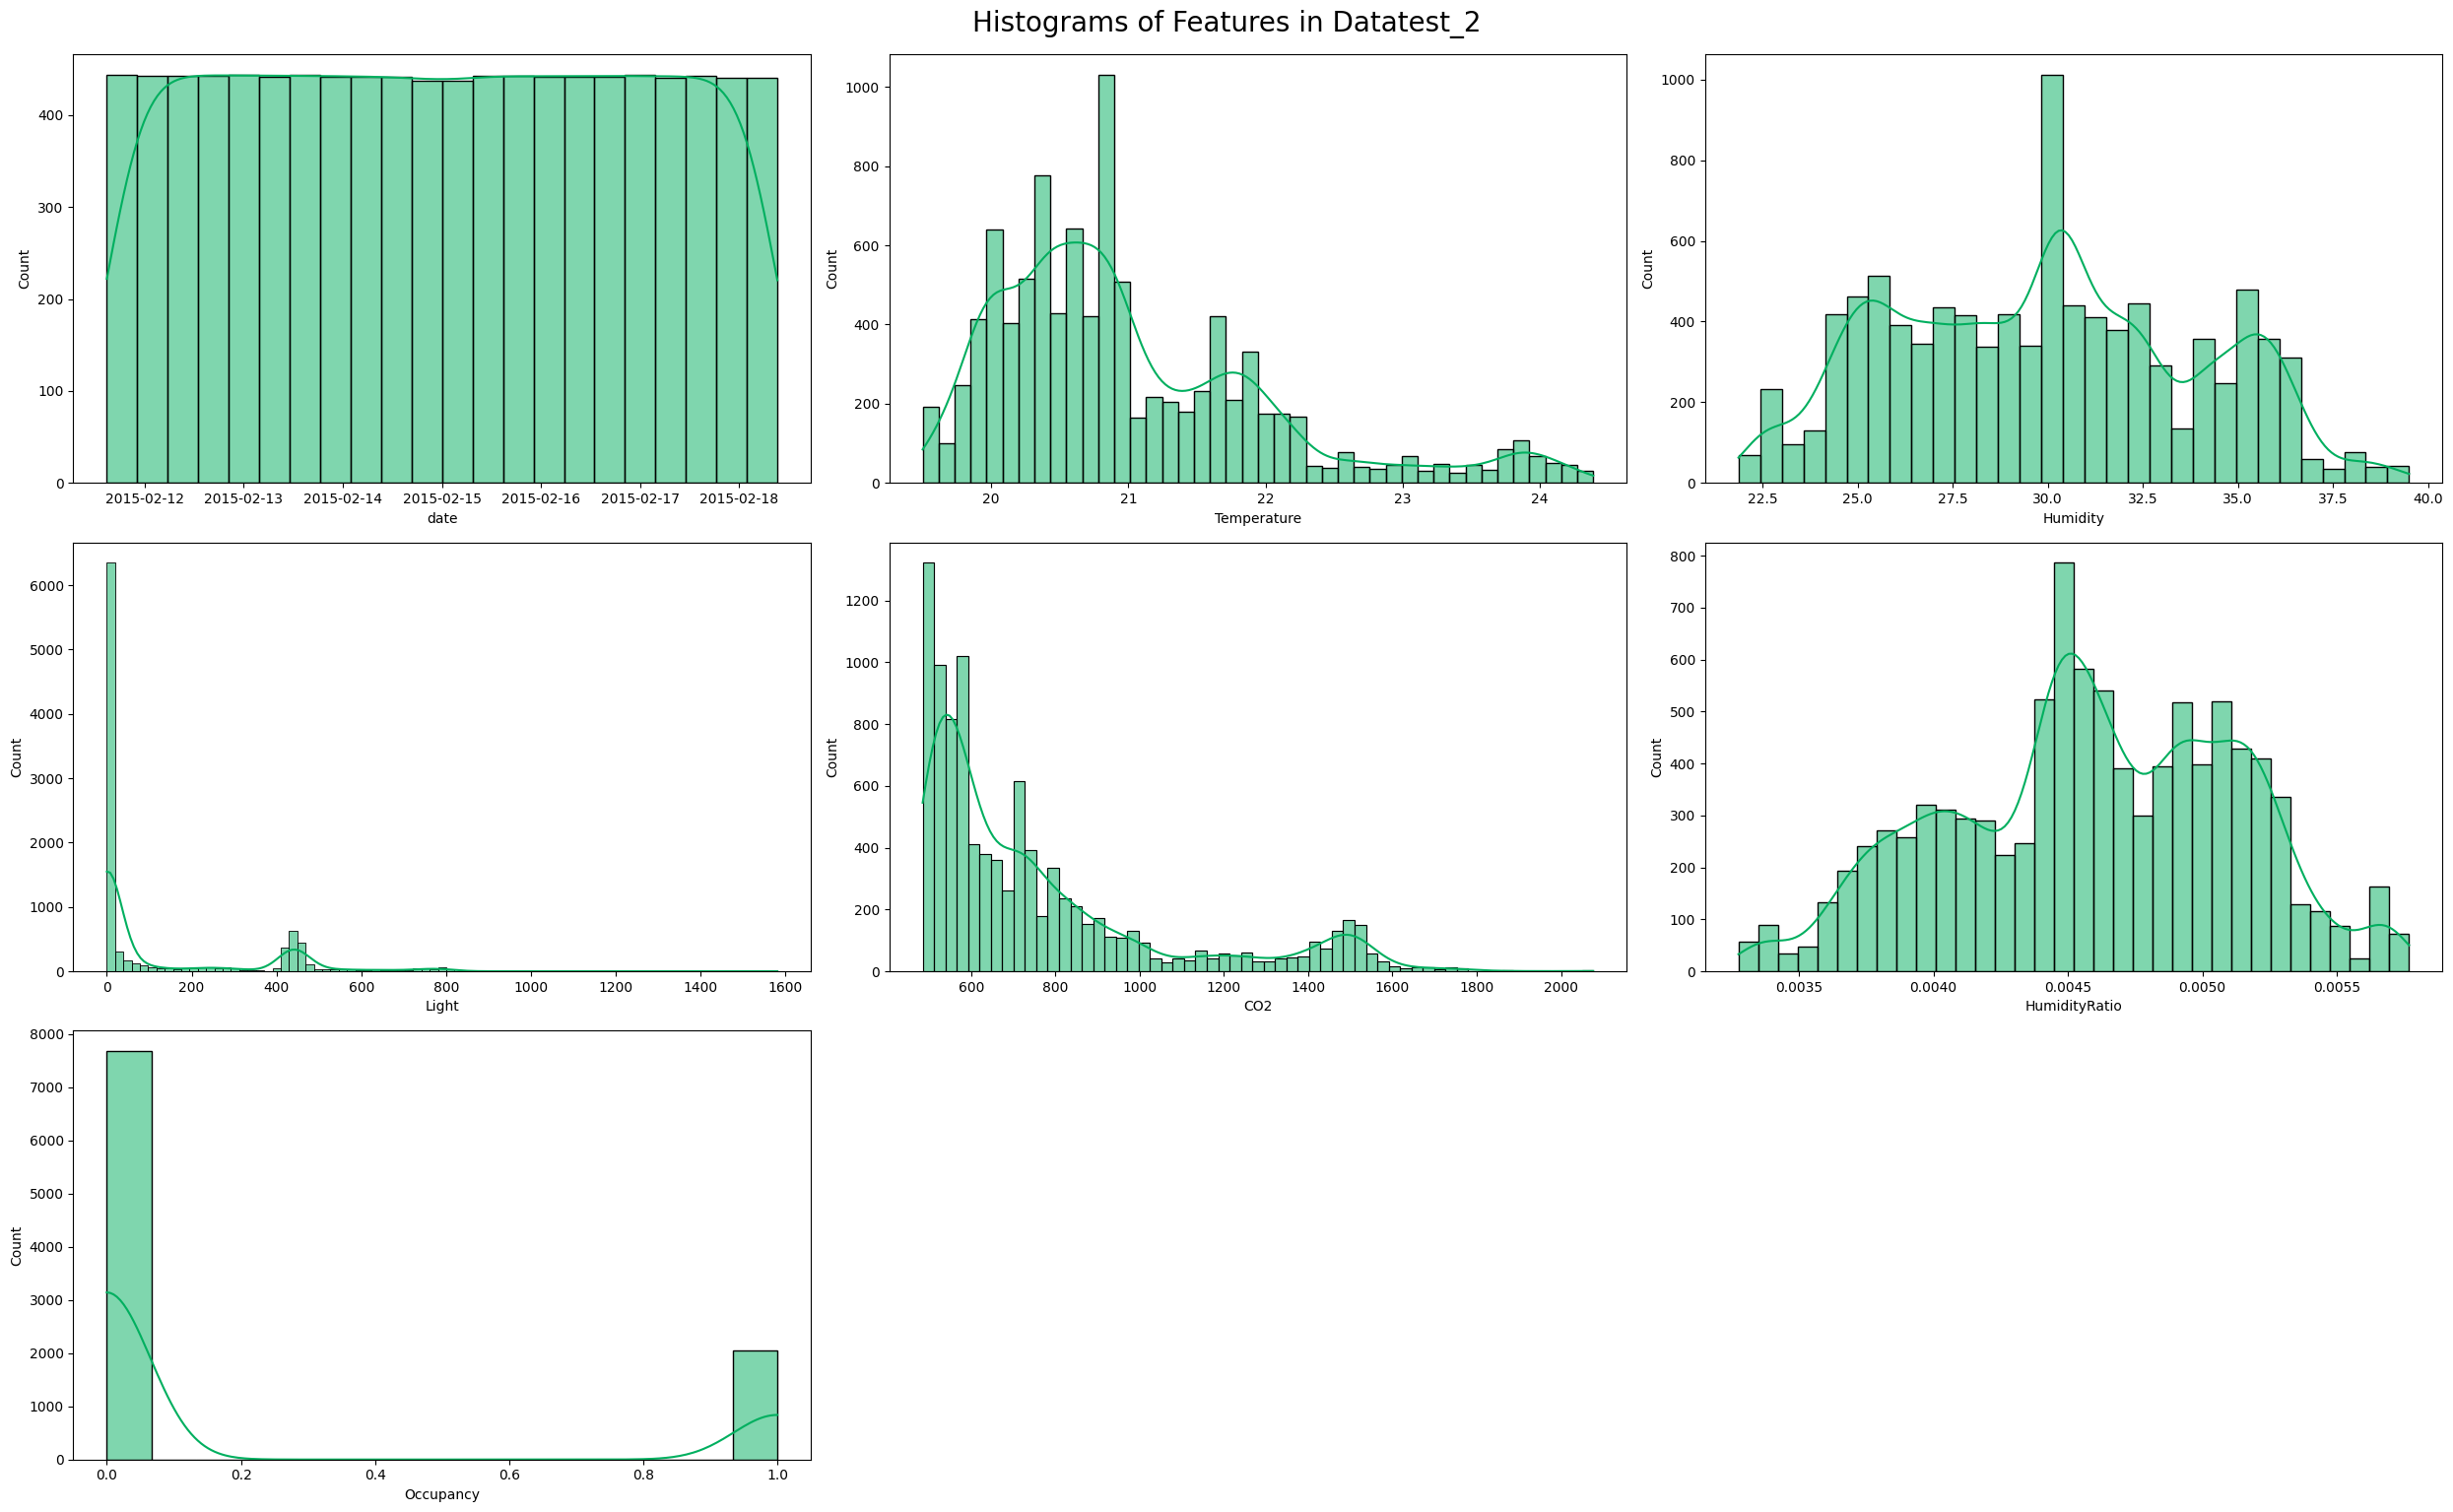

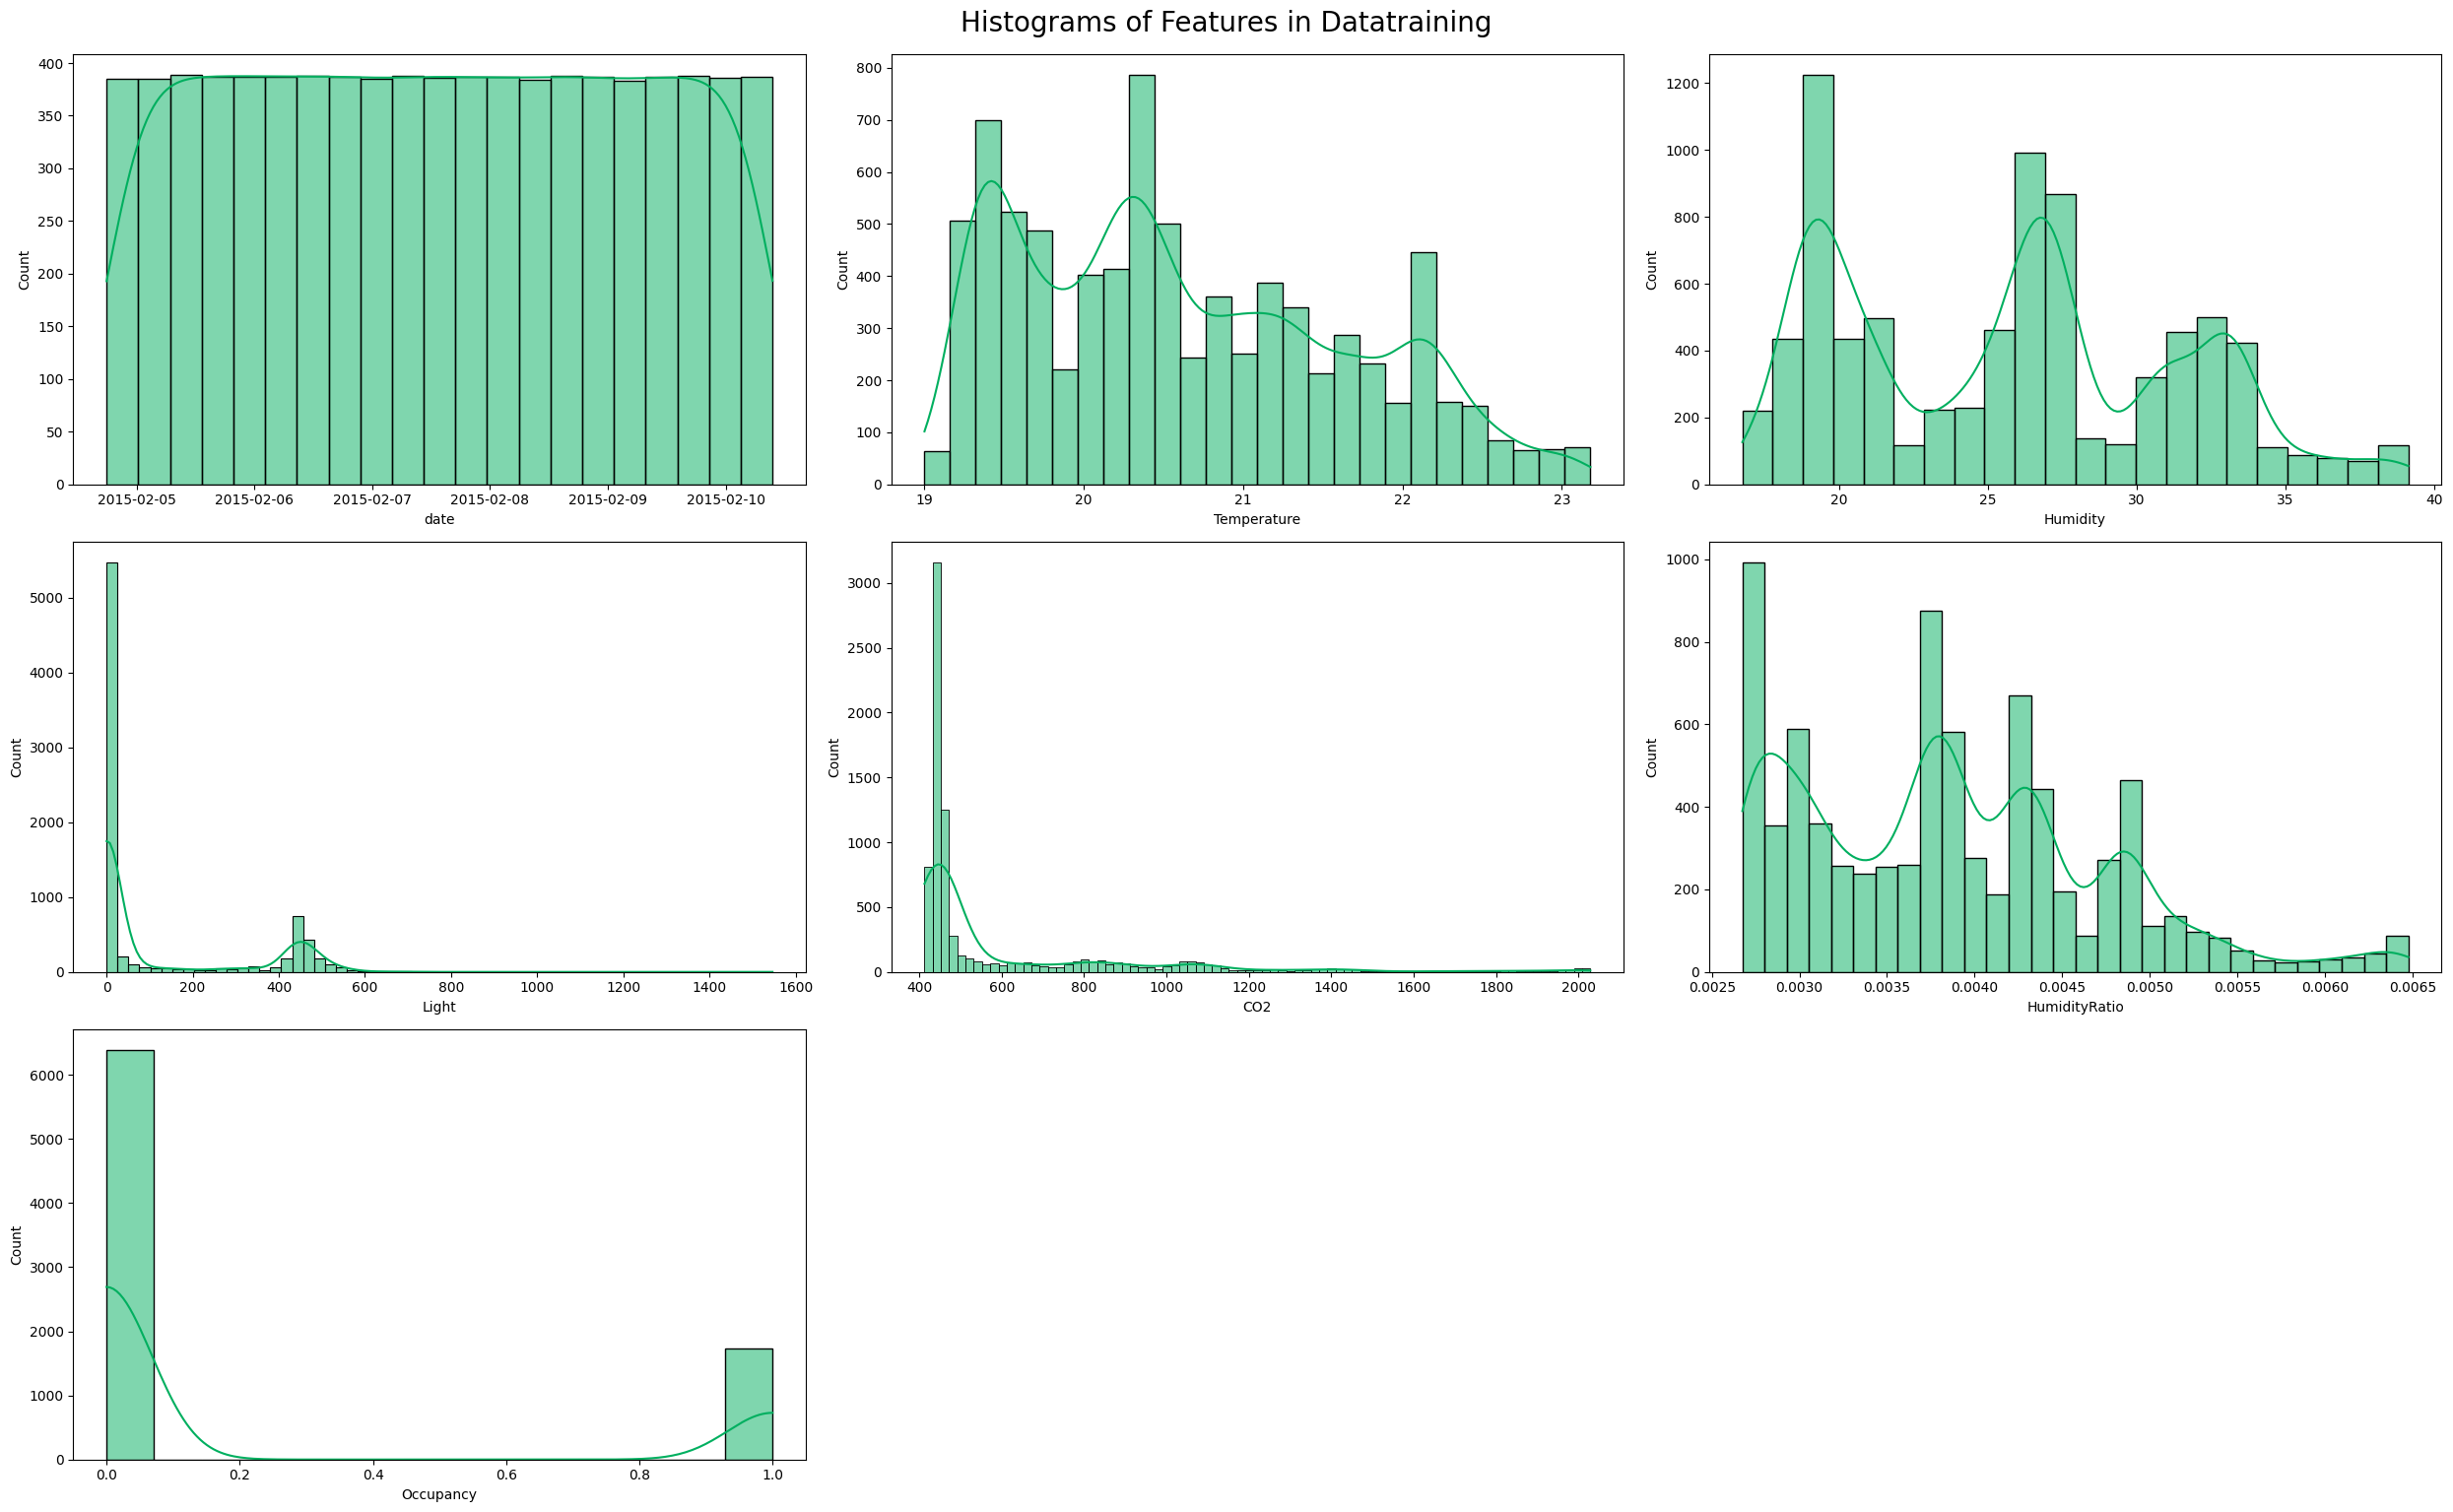

In [29]:
for name, df in datasets.items():
    plt.figure(figsize=(25, 15))
    n = 3
    for i in range(0, len(df.columns)):
        plt.subplot(n, math.ceil(len(df.columns)/n), i+1) 
        sns.histplot(df[df.columns[i]], color='#00af5f', kde=True)
        plt.tight_layout()
    plt.suptitle(f'Histograms of Features in {name}', y=1.02, size=20)

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in datatest_1.select_dtypes(include='number').columns:
    data = datatest_1[column].dropna(axis=0) 
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name": datatest_1.select_dtypes(include='number').columns,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform
print(dist)

     Column Name  Skewness  Kurtosis          Type of Distribution
0    Temperature     0.841    -0.632  Moderately Positively Skewed
1       Humidity     0.672    -0.274  Moderately Positively Skewed
2          Light     0.758    -0.542  Moderately Positively Skewed
3            CO2     0.786    -0.729  Moderately Positively Skewed
4  HumidityRatio     0.648    -0.732  Moderately Positively Skewed
5      Occupancy     0.561    -1.685  Moderately Positively Skewed
